In [1]:
from utils import *

In [1]:
thre=[50,280]
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
stats_1d=[]
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat)[0]
    stats_1d.append(statsForVXS(vxs, thre=thre, plot=0))

test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
stats_2d=[]
for i in range(8):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat)[0]
    stats_2d.append(statsForVXS(vxs, thre=thre, plot=0))

test_un=glob.glob("../data/rendered/soma/Rand/*.npy")
stats_un=[]
for i in range(200):
    mat = np.load(test_un[i])
    vxs = readVXSfromMat(mat)[0]
    stats_un.append(statsForVXS(vxs, thre=thre, plot=0))

NameError: name 'glob' is not defined

In [7]:
def readVXSfromMat(mat, grid_size=64, plot=0, **cluster_args):
    img = renderImg(mat, k_size=5, sigma=1)
    vxs, r = blob(img, **cluster_args)
    if plot == 1:
        ax = plt.subplots(111)
        plt.imshow(img)
        for i in range(len(vxs)):
            c = plt.Circle(
                (vxs[i, 0], vxs[i, 1]), r[i], color="red", linewidth=2, fill=False
            )
            ax.add_patch(c)
        ax.set_axis_off()
    return vxs, r


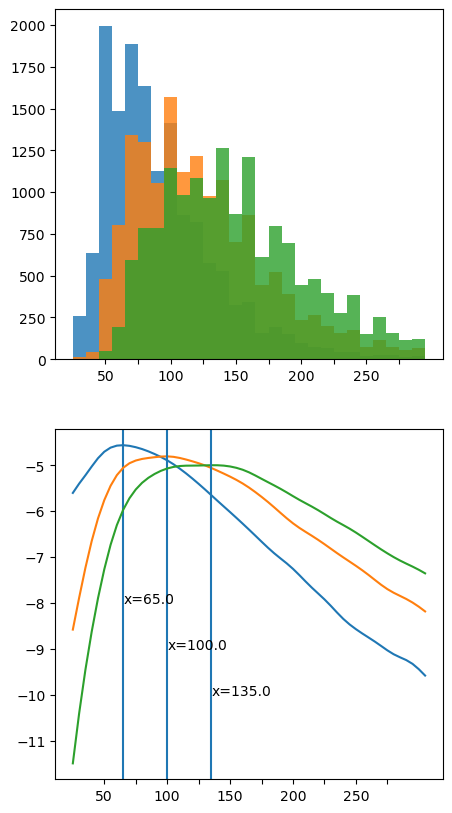

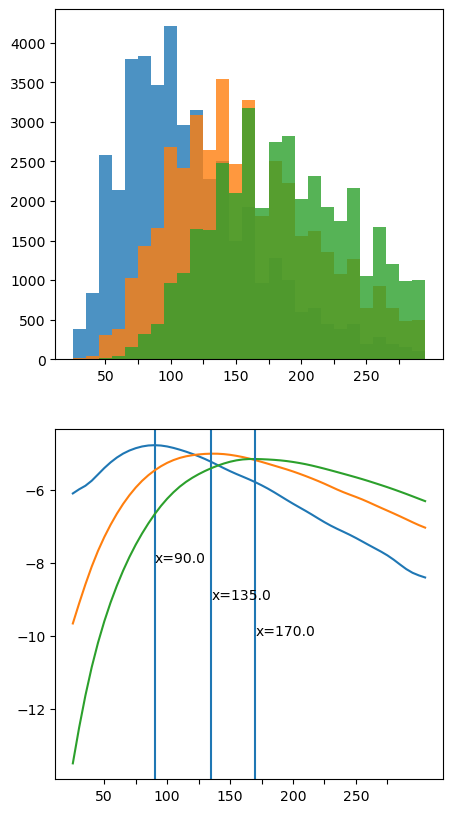

In [119]:
thre=[50,280]
t_r=0.15
bin_low = 25
bin_high = 305
bin_size = 10
p_size = 16
test_na=glob.glob("../data/rendered/Tcell/inactivated/*.npy")
test_a=glob.glob("../data/rendered/Tcell/activated/*.npy")
for test in [test_na, test_a]:
    plt.subplots(2,1,figsize=[5,10])
    dists=[[] for x in range(3)]
    for sub in test:
        #vxs = p_size*readVXSfromLoc(sub)[0] #
        vxs = p_size*readVXSfromMat(np.load(sub), min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        if len(vxs) < 5:
            continue
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)        
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    ax = plt.subplot(211)
    ticks = [50+x*25 for x in range(10)]
    for j in range(3):
        plt.hist(dists[j],bins=range(bin_low,bin_high,bin_size),alpha=0.8)
        #dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    
    ax.set_xticks(ticks,[str(x) if x%50==0 else "" for x in ticks ])
    ax = plt.subplot(212)
    for j in range(3):
        a = np.array(dists[j]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(bin_low,bin_high,int(2*(bin_high-bin_low)/bin_size)+1)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = np.argmax(e)
        plt.axvline(x=s[l_max])
        plt.text(s[l_max],-8-j,"x="+str(s[l_max]))
    ax.set_xticks(ticks,[str(x) if x%50==0 else "" for x in ticks])

In [110]:
test_na=glob.glob("../data/rendered/Tcell/inactivated/*.npy")
test_a=glob.glob("../data/rendered/Tcell/activated/*.npy")
subs = [[1,2,5], [1,2,3,5,6,7]]
conds = ["inactivated/sub_NA","activated/sub_A"]
thre=[50,280]
tests=[test_na, test_a]
stats=[[],[]]
for i in range(2):
    #plt.subplots(2,1,figsize=[5,10])
    dists=[[] for x in range(3)]
    for j in range(len(subs[i])):
        tmp_stats=[]
        sub = subs[i][j]
        test = glob.glob("../data/rendered/Tcell/"+conds[i]+str(sub)+"*.npy")
        for t in test:
            #vxs = p_size*readVXSfromLoc(sub)[0] #
            vxs = p_size*readVXSfromMat(np.load(t), min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
            if len(vxs) < 20:
                continue
            #links = generateLinks(vxs, thre=thre, plot=0)
            tmp_stats.append(statsForVXS(vxs,thre=thre))
        stats[i].append(tmp_stats)

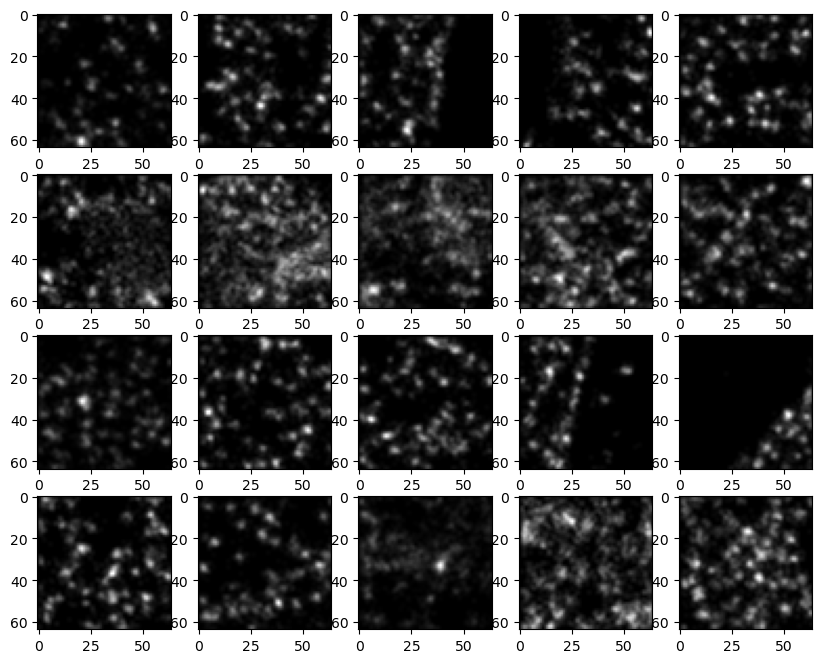

In [100]:
plt.figure(figsize=(10,8))
ji=1
thre = [50, 200]
test = glob.glob("../data/rendered/Tcell/inactivated/sub_NA1*.npy")
for i in range(20):
    plt.subplot(4, 5, ji)
    mat = np.load(test[i+20])
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(mat, kernel, mode='same')
    plt.imshow(nimg)
    # vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=0.15,plot=0)[0]
    # links = generateLinks(vxs * p_size, thre=thre, plot=0)
    # visualize(vxs, links,thre=thre, p_size=16)
    ji+=1


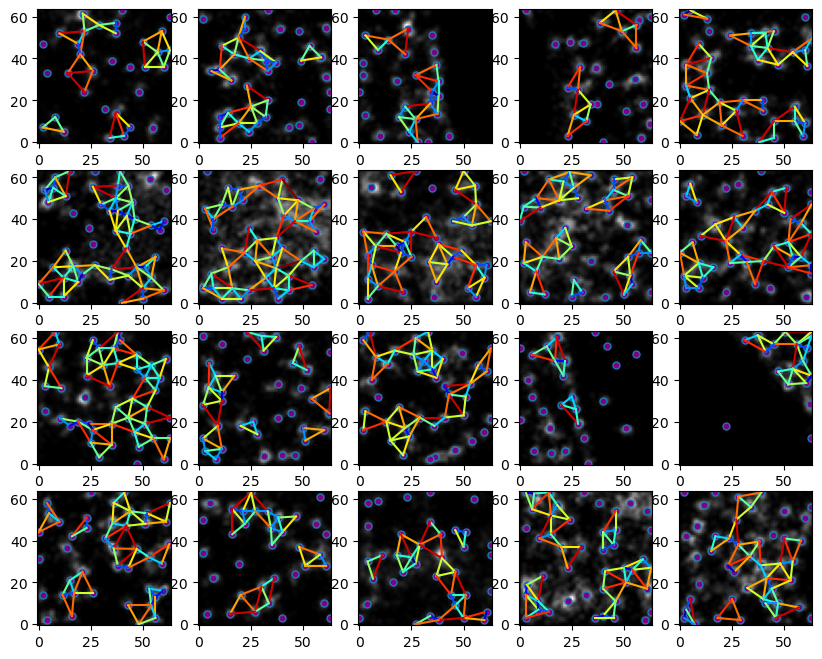

In [99]:
plt.figure(figsize=(10,8))
ji=1
test = glob.glob("../data/rendered/Tcell/inactivated/sub_NA1*.npy")
for i in range(20):
    plt.subplot(4, 5, ji)
    mat = np.load(test[i+20])
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(mat, kernel, mode='same')
    plt.imshow(nimg)
    #vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    vxs = readVXSfromLoc(test[i+20])[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    visualize(vxs, links,thre=thre, p_size=16)
    ji+=1


In [30]:
vxs
links = generateLinks(vxs, thre=thre, plot=0)
angles = getTop3Angle(vxs, links)

In [ ]:
vxs = simRandD(64*16,d=100,n=100,rand=0)
vxs = jitter(vxs, rand=10, loss=5, noise=0)

In [107]:
stats_sim = []
stats_rand = []
stats_rand2 = []
for i in range(len(stats[0][0])):    
    #vxs = readVXSfromMat(np.load(test_rand[i]))
    #stats_un.append(statsForVXS(vxs, plot=0, thre=thre))
    counts = int(stats[0][0][i][0])
    for j in range(1):
        vxs = simRand(size=65*16, n=counts)
        stats_rand.append(statsForVXS(vxs, plot=0, thre=thre))
        vxs = simRand2(size=64*16, n=counts)
        stats_rand2.append(statsForVXS(vxs, plot=0, thre=thre))
        vxs = simRandD(64*16,d=100,n=counts+10)
        vxs = jitter(vxs, rand=10, loss=5, noise=0)
        stats_sim.append(statsForVXS(vxs, plot=0, thre=thre))

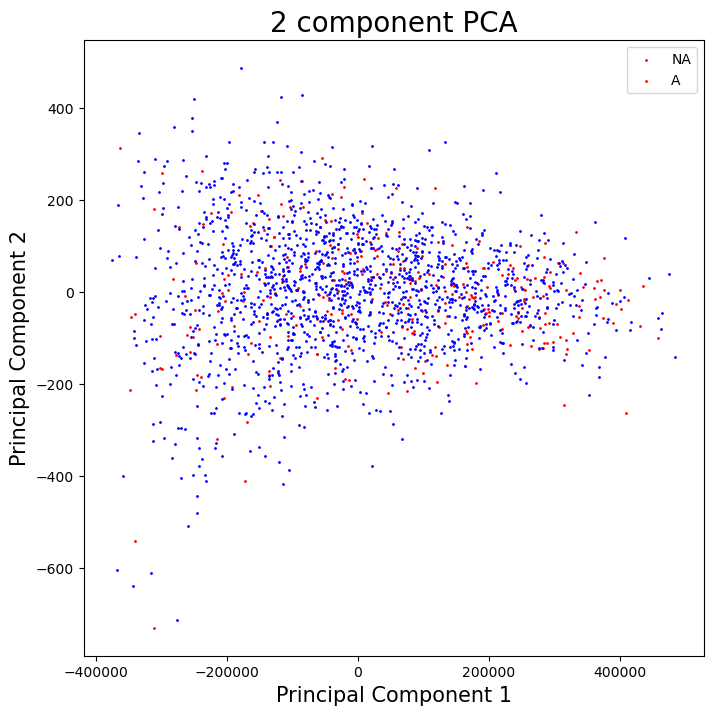

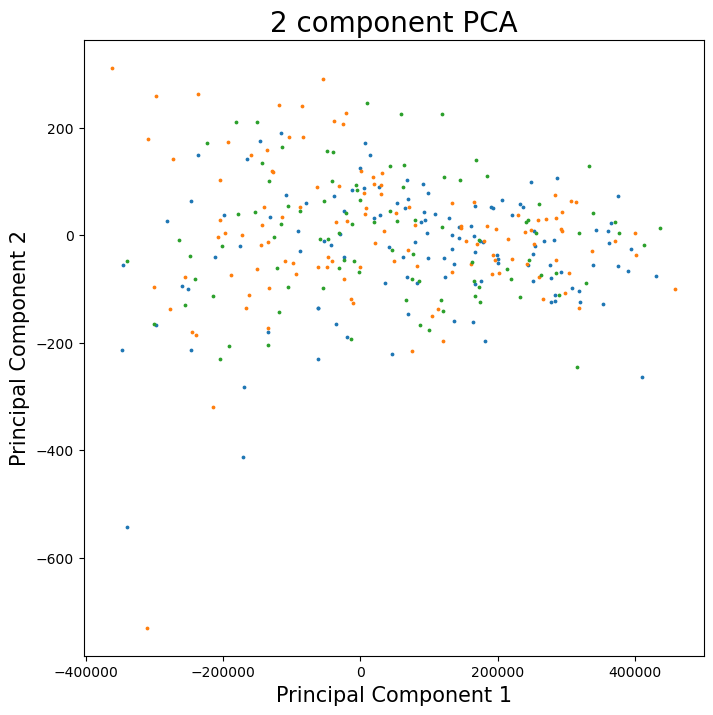

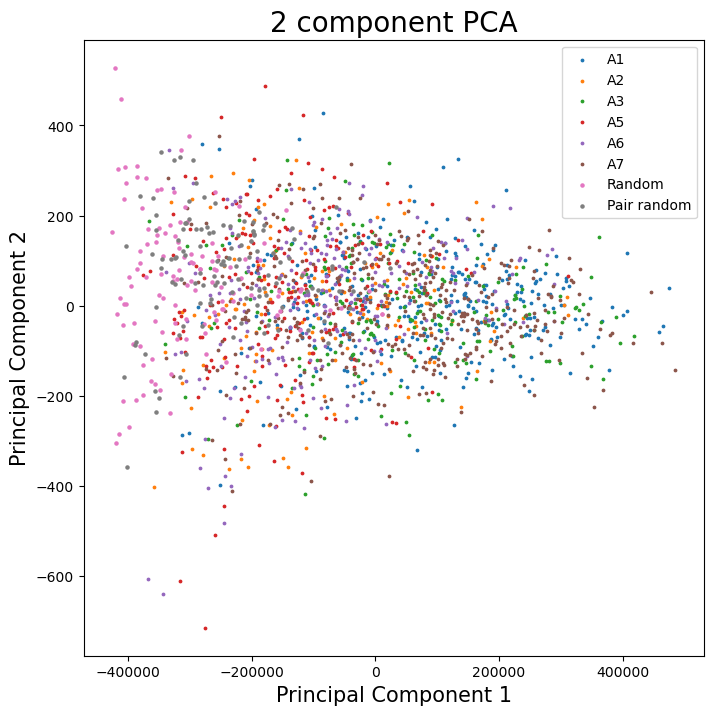

In [117]:
# from sklearn.decomposition import PCA
# all_stats=stats[0].copy()
# all_stats.extend(stats[1].copy())
# all_stats = np.array(all_stats)
# pca = PCA(n_components=2)

# pca_all = pca.fit_transform(np.nan_to_num(all_stats))
# principalDf = pd.DataFrame(data = pca_all
#              , columns = ['PCA1', 'PCA2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#ax.scatter(pca_un[:,0], pca_un[:,1],s=4, alpha=0.5)
colors=["red","blue"]
for i in range(2):
    for j in range(len(subs[i])):
        pca_data = pca.transform(np.nan_to_num(np.array(stats[i][j])))
        ax.scatter(pca_data[:,0], pca_data[:,1],s=1,color=colors[i])
plt.legend(["NA","A"])
for i in range(2):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for j in range(len(subs[i])):
        pca_data = pca.transform(np.nan_to_num(np.array(stats[i][j])))
        ax.scatter(pca_data[:,0], pca_data[:,1],s=3)

# stats_sim, 
for stat in [stats_rand, stats_rand2]:
    pca_data = pca.transform(np.nan_to_num(np.array(stat)))
    ax.scatter(pca_data[:,0], pca_data[:,1],s=5)

# subs = [[1,2,5], [1,2,3,5,6,7]]
# conds = ["inactivated/sub_NA","activated/sub_A"]
plt.legend(["A1","A2","A3","A5","A6","A7","Random","Pair random"])

In [80]:
all_res = []
conds = ["A","NA"]
for i in range(2):
    for j in range(len(subs[i])):
        df = pd.DataFrame(
            np.array(stats[i][j]),
            columns=["Density", 
                "#Average Connections", 
                "Average Deviation of links", 
                "%Area","Elastic Energy", 
                "Average Deviation of Angles from 60 degree", 
                "Average Deviation of Angles from 30 degree",
                "angle_std",
                "n_peak",
                "main_angle",
                "highest_peak", 
                "largest_angle", 
                "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
        df["conds"]=conds[i]
        df["cell"]=conds[i]+str(subs[i][j])
        all_res.append(df)
df_res = pd.concat(all_res)

In [70]:
import umap

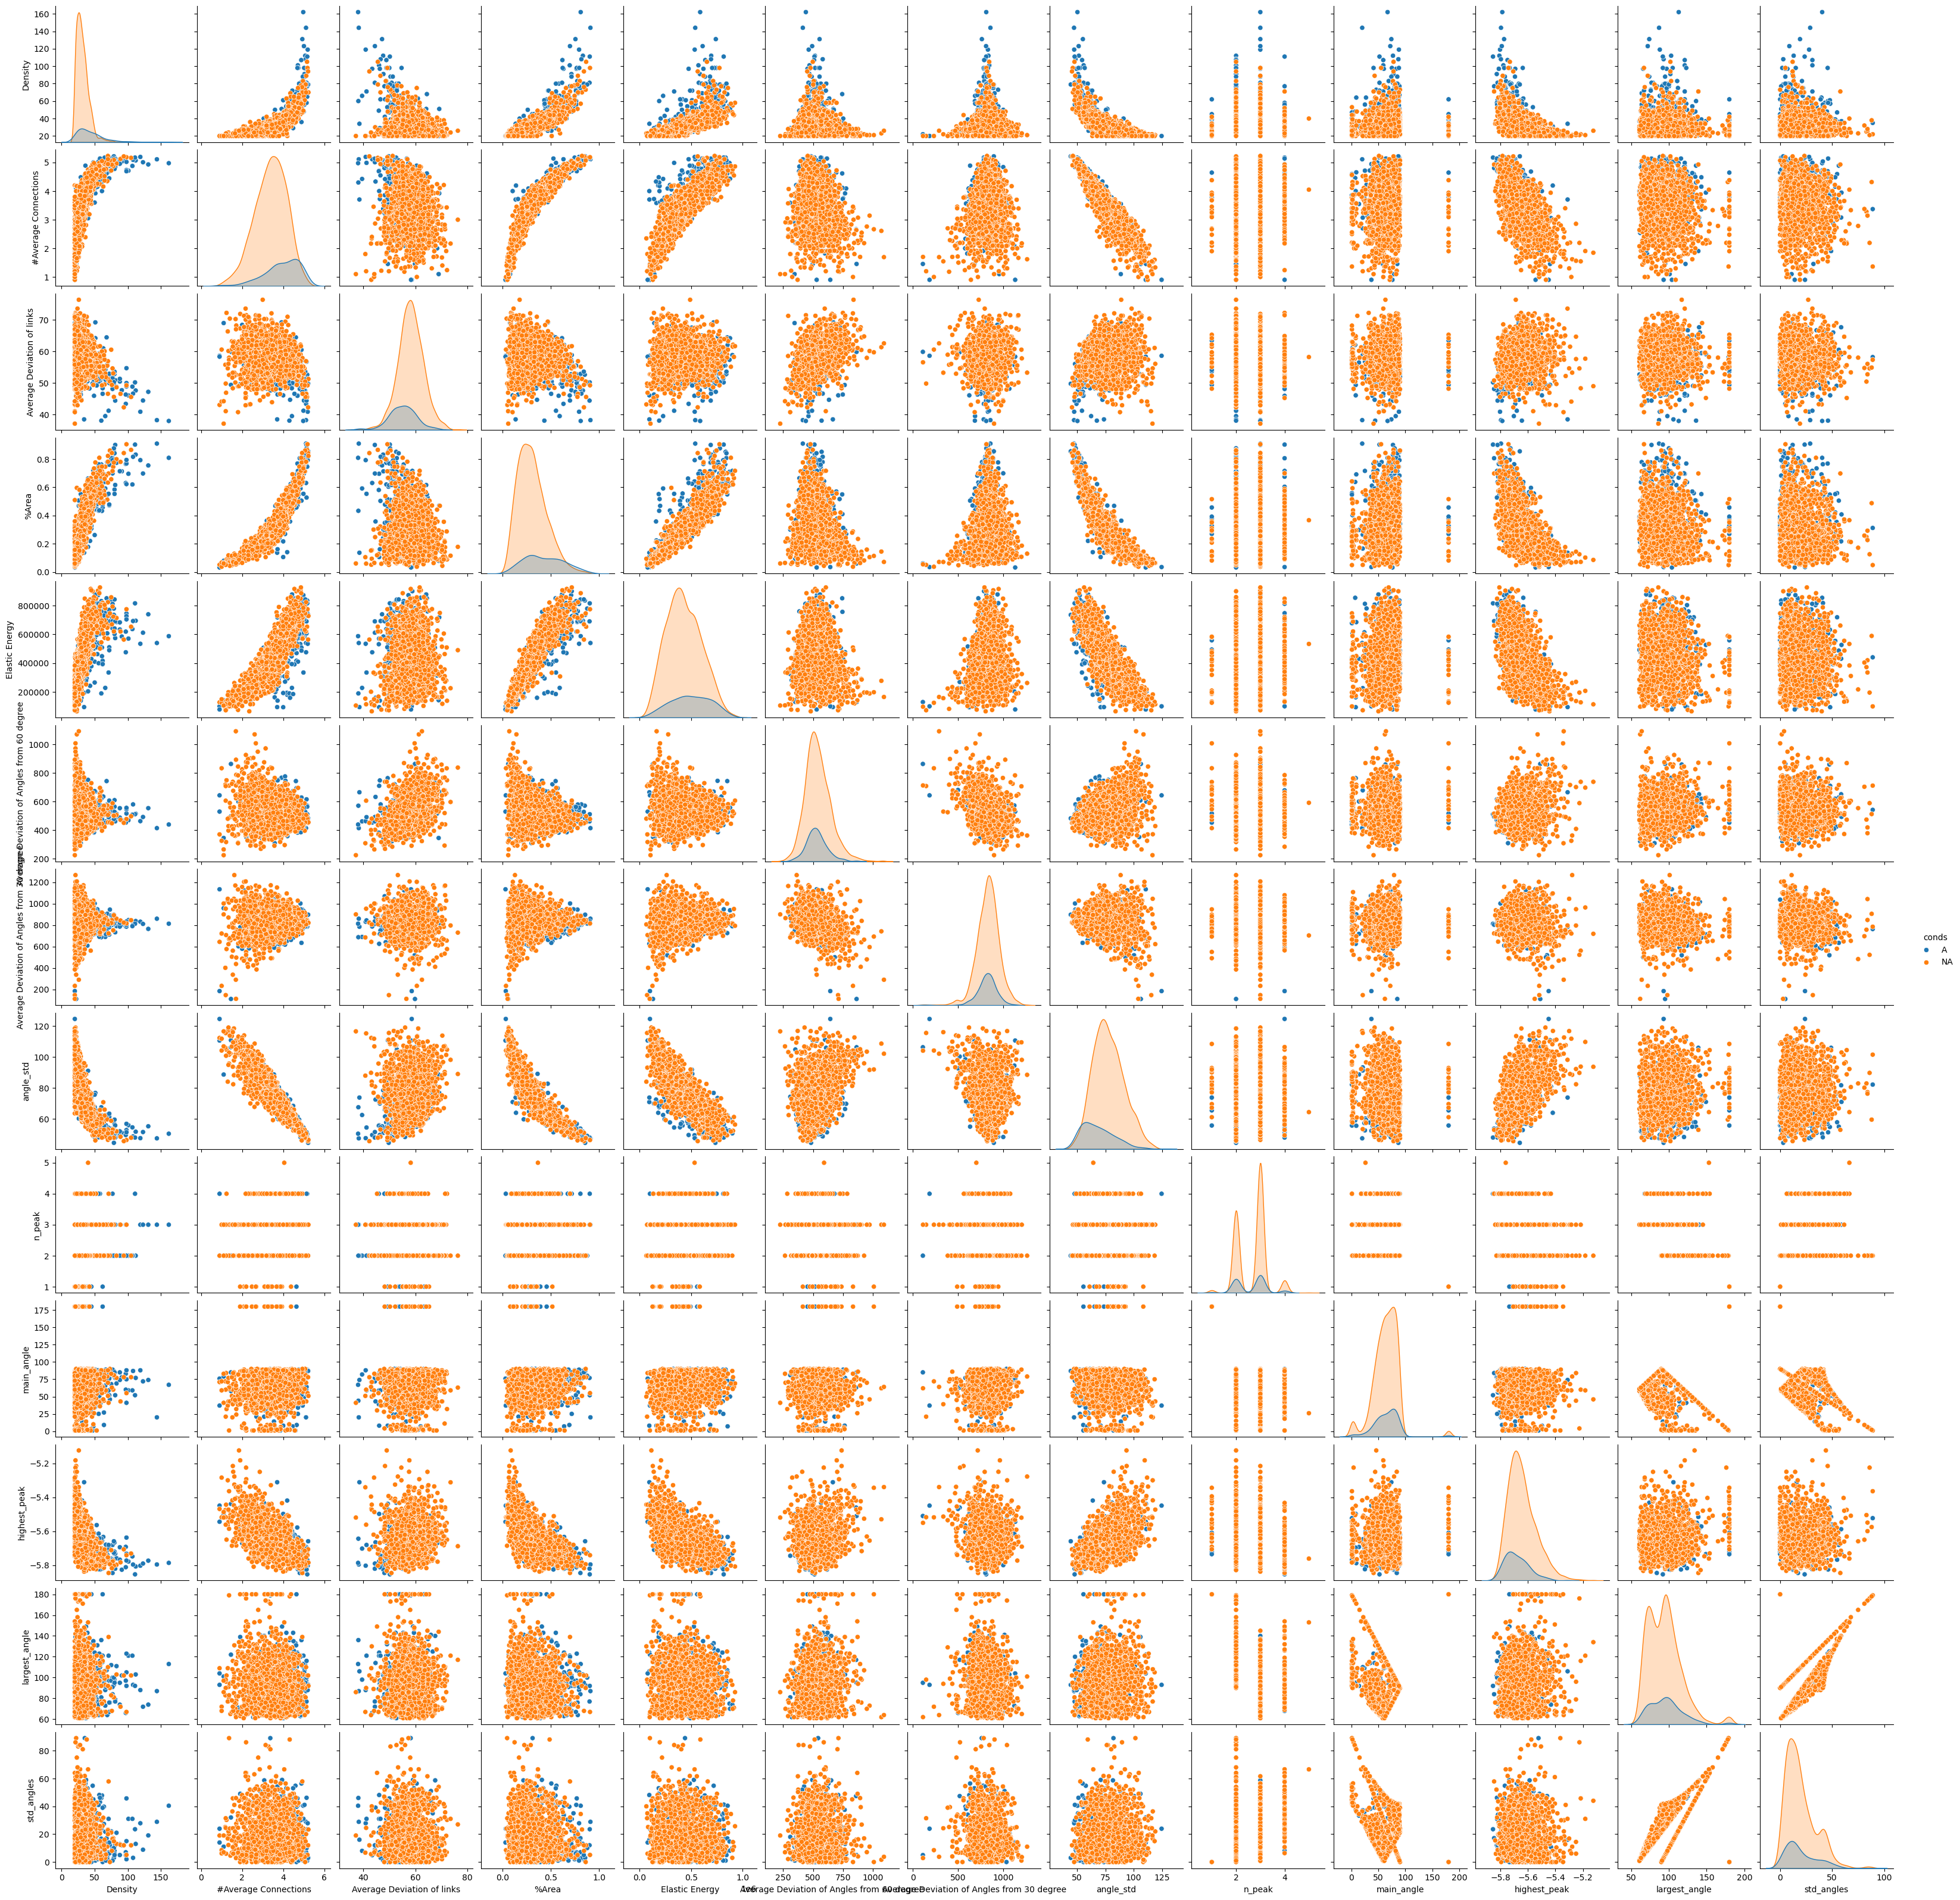

In [82]:
sns.pairplot(df_res.drop("cell", axis=1), hue='conds')

In [ ]:
sns.pairplot(penguins.drop("year", axis=1), hue='conds')

In [2]:
def readVXSfromLoc(loc, grid_size=64, plot=0, **loc_args):
    # edit to read mat, the difference is that here it use lmax_loc instead of blob
    # smlm = pd.read_csv(loc, header=0)
    # xc = np.array(smlm["Xc"].tolist()).astype(np.int32)
    # yc = np.array(smlm["Yc"].tolist()).astype(np.int32)
    # img = grid2D(
    #     np.zeros([grid_size, grid_size], dtype=np.int32),
    #     xc,
    #     yc,
    #     grid_size,
    #     grid_size,
    #     len(xc),
    # )
    img = np.load(loc)
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g * g.T
    nimg = scipy.signal.fftconvolve(img, kernel, mode="same")
    if plot == 1:
        plt.imshow(nimg)
    return lmax_loc(None, None, nimg, adapt=55, local=5, sm=3, plot=0, **loc_args)[1:]